In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('student-mat.csv',sep=";")

In [3]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
encoded_df = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
categorical_data = data[categorical_columns]
print(categorical_data.head())

  school sex address famsize Pstatus     Mjob      Fjob  reason guardian  \
0     GP   F       U     GT3       A  at_home   teacher  course   mother   
1     GP   F       U     GT3       T  at_home     other  course   father   
2     GP   F       U     LE3       T  at_home     other   other   mother   
3     GP   F       U     GT3       T   health  services    home   mother   
4     GP   F       U     GT3       T    other     other    home   father   

  schoolsup famsup paid activities nursery higher internet romantic  
0       yes     no   no         no     yes    yes       no       no  
1        no    yes   no         no      no    yes      yes       no  
2       yes     no  yes         no     yes    yes      yes       no  
3        no    yes  yes        yes     yes    yes      yes      yes  
4        no    yes  yes         no     yes    yes       no       no  


In [4]:
X = encoded_df.drop(['G3','G2','G1'], axis=1)
Y = encoded_df['G3']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=20)
print("Training set shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
x_train: (355, 39)
y_train: (355,)

Testing set shapes:
x_test: (40, 39)
y_test: (40,)


In [5]:
best = 0
for _ in range(10):
    x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.1)
    linear=linear_model.LinearRegression()
    linear.fit(x_train,y_train)
   # accuracy=linear.score(x_test,y_test)
    accuracy = cross_val_score(linear, X, Y, cv=5).mean()
    if accuracy>best:
        with open("Studentmodel1.pickle","wb") as f:
            pickle.dump(linear,f)
pickle_in = open("Studentmodel1.pickle", "rb")
linear = pickle.load(pickle_in)
best_accuracy = linear.score(x_test, y_test)
print("Accuracy for Linear Regression Befor Feature Selection:", best_accuracy)
#linear_cv_accuracy = cross_val_score(linear, X, Y, cv=5).mean()
#print("Linear linear Cross-Validation Accuracy:", linear_cv_accuracy)

Accuracy for Linear Regression Befor Feature Selection: 0.1788023917505399


In [6]:
print("Co-efficient: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)
prediction= linear.predict(x_test)
print("Actual Value\t\tPredicted Value")
for x in range(len(prediction)):
    print("{}\t\t{:.5f}".format(y_test.values[x], prediction[x]))

Co-efficient: 
 [-0.52706655  0.51574341 -0.15818975 -0.31948386  0.47762677 -1.85788388
  0.3032748   0.10771015 -0.54273859 -0.13214616  0.2222942  -0.20188518
  0.05061966  1.02766482  1.31720437  0.44177071  0.64061531 -0.19573525
  0.69925193 -0.63065118  0.57853587 -1.28930269  0.48079082 -0.74281545
 -0.6142208   1.62744945  0.09592283  0.56579336  0.71965694  0.23044743
  1.2483181  -1.68387568 -0.92612753  0.34234422 -0.47870962 -0.045971
  0.07055794  0.60750417 -1.0528712 ]
Intercept: 
 18.28367641931225
Actual Value		Predicted Value
6		8.29626
11		10.42945
10		3.24546
15		11.43757
0		6.47882
13		7.14507
14		13.35908
13		11.43312
14		8.00099
12		6.63567
0		5.91775
8		9.55361
10		13.85684
10		11.76810
12		13.40740
11		11.56268
11		8.90394
8		6.79973
12		7.66553
11		12.19222
8		8.15711
10		11.63384
10		9.81929
8		6.54916
8		9.35312
12		11.88547
8		11.48413
5		10.32269
11		7.66105
6		10.65563
14		12.10969
0		2.36560
14		13.03421
13		11.55062
6		7.99961
10		13.59487
15		14.97786

In [7]:
best_accuracy_after_fs = 0  
selected_feature_indices = None
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
    rfe = RFE(LinearRegression(), n_features_to_select=17)
    rfe.fit(x_train, y_train)
    selected_features = rfe.get_support()
    selected_feature_indices = [i for i, val in enumerate(selected_features) if val]
    linear.fit(x_train.loc[:, selected_features], y_train)
    #accuracy_after_fs = linear.score(x_test.loc[:, selected_features], y_test)
    accuracy_after_fs = cross_val_score(linear, X, Y, cv=5).mean()
    if accuracy_after_fs > best_accuracy_after_fs:  
        best_accuracy_after_fs = accuracy_after_fs  
        with open("Studentmodel2.pickle", "wb") as f:
            pickle.dump(linear, f)
pickle_in_fs = open("Studentmodel2.pickle", "rb")
linear_fs = pickle.load(pickle_in_fs)
best_accuracy_after_fs = cross_val_score(linear, X, Y, cv=5).mean()
#best_accuracy_after_fs=linear_fs.score(x_test,y_test)
print("Best Accuracy After Feature Selection:", best_accuracy_after_fs)


Best Accuracy After Feature Selection: 0.0014623525868094679


In [8]:
print("Co-efficient: \n", linear_fs.coef_)
print("Intercept: \n", linear_fs.intercept_)
#x_test_selected_dense = x_test.values
#prediction2 = linear_fs.predict(x_test_selected_dense)
x_test_selected_dense = x_test.iloc[:, selected_feature_indices].values  # Use .iloc to select columns
prediction2 = linear_fs.predict(x_test_selected_dense)
print("Actual Value\t\tPredicted Value")
for x in range(len(prediction2)):
    print("{}\t\t{:.5f}".format(y_test.values[x], prediction2[x]))

Co-efficient: 
 [-2.03827951  0.99773541  0.66998543 -0.87270344  2.08776647  1.54394343
 -0.4466252   1.57914449  1.04063796  1.02710719  1.1126898  -0.97702313
 -1.02897841  0.71442665  1.60393455  0.83602976 -1.02923688]
Intercept: 
 8.354509593038852
Actual Value		Predicted Value
13		9.97126
11		5.53066
15		6.11114
18		8.55348
10		7.93675
14		8.55348
0		3.57583
16		8.60296
6		8.19891
13		11.70502
11		9.01663
7		9.43758
13		8.48196
10		3.66539
10		4.74471
10		4.69463
15		6.90400
0		7.43791
0		9.21440
10		4.86819
8		6.20065
10		2.43864
12		5.63564
14		5.58074
18		11.71975
0		10.80295
13		7.74459
10		10.28739
10		7.95058
8		9.00581
9		6.59696
16		10.19462
15		7.54230
12		9.69572
14		4.07791
16		7.13549
12		8.22157
16		4.72725
0		2.46314
13		6.58919


f:\Advance Java\Python\Env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
best_gb_model = None
best_accuracy = 0
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=30)
    gb_model.fit(x_train, y_train)
    #accuracy = gb_model.score(x_test, y_test)
    #accuracy = gb_model.cross_val_score(linear, X, Y, cv=5).mean()
    accuracy = cross_val_score(gb_model, X, Y, cv=5).mean() 
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_gb_model = gb_model

with open("Gradient_Boosting.pickle", "wb") as f:
    pickle.dump(best_gb_model, f)
pickle_in_gb = open("Gradient_Boosting.pickle", "rb")
linear_gb = pickle.load(pickle_in_gb)
best_gb_accuracy=linear_gb.score(x_test,y_test)
print("Best Accuracy Gradient Boosting Regressor :",best_gb_accuracy )

KeyboardInterrupt: 

In [ ]:


best_rf_model = None
best_rf_accuracy = 0

for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)  
    rf_model = RandomForestRegressor(n_estimators=100, random_state=30)
    rf_model.fit(x_train, y_train)
    #rf_accuracy = rf_model.score(x_test, y_test)
    rf_accuracy = cross_val_score(rf_model, X, Y, cv=6).mean() 
    if rf_accuracy > best_rf_accuracy:
        best_rf_accuracy = rf_accuracy
        best_rf_model = rf_model
with open("Random_Forest.pickle", "wb") as f:
    pickle.dump(best_rf_model, f)
pickle_in_rf = open("Random_Forest.pickle", "rb") 
linear_rf = pickle.load(pickle_in_rf)
best_rf_accuracy=linear_rf.score(x_test,y_test)
print("Best Accuracy After Random Forest:", best_rf_accuracy)


Best Accuracy After Random Forest: 0.29496970463921446


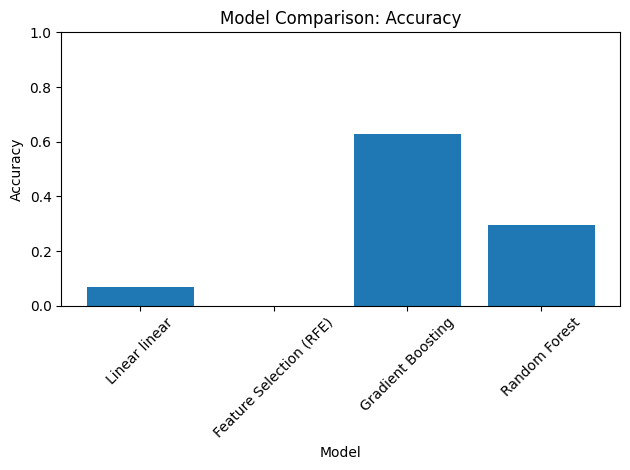

In [ ]:

model_names = ['Linear linear', 'Feature Selection (RFE)', 'Gradient Boosting', 'Random Forest']
accuracies = [best_accuracy, best_accuracy_after_fs, best_gb_accuracy, best_rf_accuracy]

plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


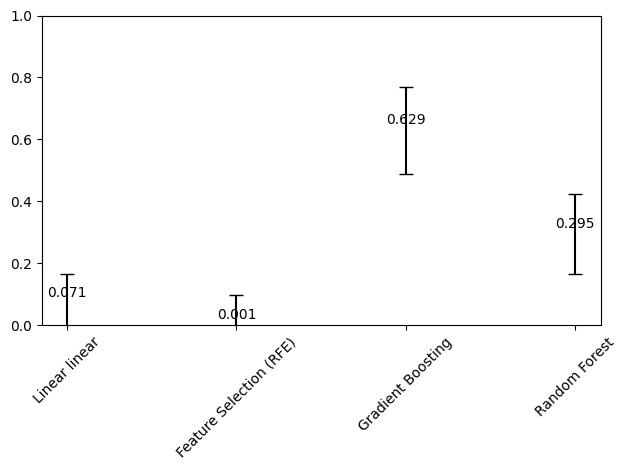

In [ ]:
errors = [np.std(cross_val_score(model, X, Y, cv=5)) for model in [linear, linear_fs, linear_gb, linear_rf]]
plt.errorbar(model_names, accuracies, yerr=errors, fmt='none', color='black', capsize=5)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', va='bottom')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()


F:\Advance Java\Python\Env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Feature Selection Precision: 0.4170454545454545
Feature Selection Recall: 0.1
Feature Selection F1 Score: 0.6243589743589744
Linear linear Precision: 0.4170454545454545
Linear linear Recall: 0.1
Linear linear F1 Score: 0.6243589743589744
Gradient Boosting Precision: 0.5395833333333333
Gradient Boosting Recall: 0.175
Gradient Boosting F1 Score: 0.45999999999999996
Random Forest Precision: 0.4341666666666667
Random Forest Recall: 0.125
Random Forest F1 Score: 0.38075396825396823


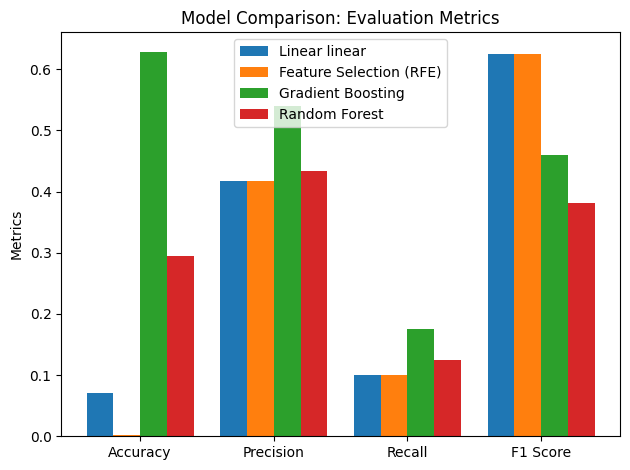

In [ ]:

y_pred_fs = linear_fs.predict(x_test_selected_dense)
precision_fs = precision_score(y_test, y_pred_fs.round(), average='weighted', zero_division=1)
recall_fs = recall_score(y_test, y_pred_fs.round(), average='weighted', zero_division=1)
f1_fs = f1_score(y_test, y_pred_fs.round(), average='weighted', zero_division=1)
print("Feature Selection Precision:", precision_fs)
print("Feature Selection Recall:", recall_fs)
print("Feature Selection F1 Score:", f1_fs)
precision_linear = precision_score(y_test, prediction2.round(), average='weighted', zero_division=1)
recall_linear = recall_score(y_test, prediction2.round(), average='weighted', zero_division=1)
f1_linear = f1_score(y_test, prediction2.round(), average='weighted', zero_division=1)
print("Linear linear Precision:", precision_linear)
print("Linear linear Recall:", recall_linear)
print("Linear linear F1 Score:", f1_linear)
precision_gb = precision_score(y_test, linear_gb.predict(x_test).round(), average='weighted', zero_division=1)
recall_gb = recall_score(y_test, linear_gb.predict(x_test).round(), average='weighted', zero_division=1)
f1_gb = f1_score(y_test, linear_gb.predict(x_test).round(), average='weighted', zero_division=1)
print("Gradient Boosting Precision:", precision_gb)
print("Gradient Boosting Recall:", recall_gb)
print("Gradient Boosting F1 Score:", f1_gb)
precision_rf = precision_score(y_test, linear_rf.predict(x_test).round(), average='weighted', zero_division=1)
recall_rf = recall_score(y_test, linear_rf.predict(x_test).round(), average='weighted', zero_division=1)
f1_rf = f1_score(y_test, linear_rf.predict(x_test).round(), average='weighted', zero_division=1)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
feature_metrics= [best_accuracy_after_fs,precision_fs,recall_fs,f1_fs]
linear_metrics = [best_accuracy, precision_linear, recall_linear, f1_linear]
gb_metrics = [best_gb_accuracy, precision_gb, recall_gb, f1_gb]
rf_metrics = [best_rf_accuracy, precision_rf, recall_rf, f1_rf]

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width * 1.5, linear_metrics, width, label='Linear linear')
rects2 = ax.bar(x - width * 0.5, feature_metrics, width, label='Feature Selection (RFE)')
rects3 = ax.bar(x + width * 0.5, gb_metrics, width, label='Gradient Boosting')
rects4 = ax.bar(x + width * 1.5, rf_metrics, width, label='Random Forest')

ax.set_ylabel('Metrics')
ax.set_title('Model Comparison: Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# ... (Assuming you have defined y_pred_fs, gb, rf, and other variables)

precision_scores_fs = []
recall_scores_fs = []
f1_scores_fs = []
precision_scores_linear = []
recall_scores_linear = []
f1_scores_linear = []
precision_scores_gb = []
recall_scores_gb = []
f1_scores_gb = []
precision_scores_rf = []
recall_scores_rf = []
f1_scores_rf = []
thresholds = np.linspace(0, 1, 10)

# ... (Assuming you have defined x_test and y_test)

# Loop through thresholds and calculate precision, recall, and F1-score for each model
for threshold in thresholds:
    y_pred_fs_round = (y_pred_fs >= threshold).astype(int)
    y_pred_linear_round = (prediction2 >= threshold).astype(int)
    y_pred_gb_round = (gb.predict(x_test) >= threshold).astype(int)  # Change to gb
    y_pred_rf_round = (rf.predict(x_test) >= threshold).astype(int)  # Change to rf
    
    precision_scores_fs.append(precision_score(y_test, y_pred_fs_round, average='weighted', zero_division=1))
    recall_scores_fs.append(recall_score(y_test, y_pred_fs_round, average='weighted', zero_division=1))
    f1_scores_fs.append(f1_score(y_test, y_pred_fs_round, average='weighted', zero_division=1))
    
    precision_scores_linear.append(precision_score(y_test, y_pred_linear_round, average='weighted', zero_division=1))
    recall_scores_linear.append(recall_score(y_test, y_pred_linear_round, average='weighted', zero_division=1))
    f1_scores_linear.append(f1_score(y_test, y_pred_linear_round, average='weighted', zero_division=1))
    
    precision_scores_gb.append(precision_score(y_test, y_pred_gb_round, average='weighted', zero_division=1))
    recall_scores_gb.append(recall_score(y_test, y_pred_gb_round, average='weighted', zero_division=1))
    f1_scores_gb.append(f1_score(y_test, y_pred_gb_round, average='weighted', zero_division=1))
    
    precision_scores_rf.append(precision_score(y_test, y_pred_rf_round, average='weighted', zero_division=1))
    recall_scores_rf.append(recall_score(y_test, y_pred_rf_round, average='weighted', zero_division=1))
    f1_scores_rf.append(f1_score(y_test, y_pred_rf_round, average='weighted', zero_division=1))

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall_scores_fs, precision_scores_fs, label='Feature Selection (RFE)')
plt.plot(recall_scores_linear, precision_scores_linear, label='Linear Regression')
plt.plot(recall_scores_gb, precision_scores_gb, label='Gradient Boosting')
plt.plot(recall_scores_rf, precision_scores_rf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# ... (Repeat similar code for other curves)


NameError: name 'gb' is not defined

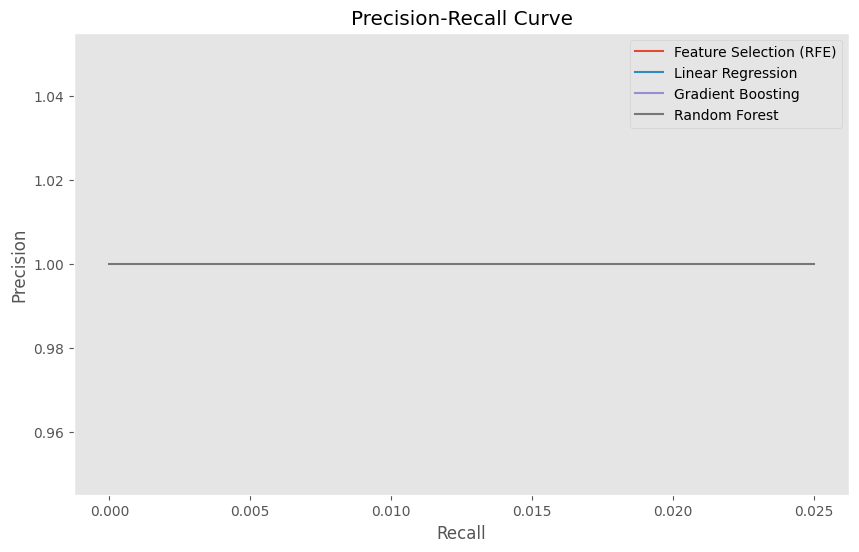

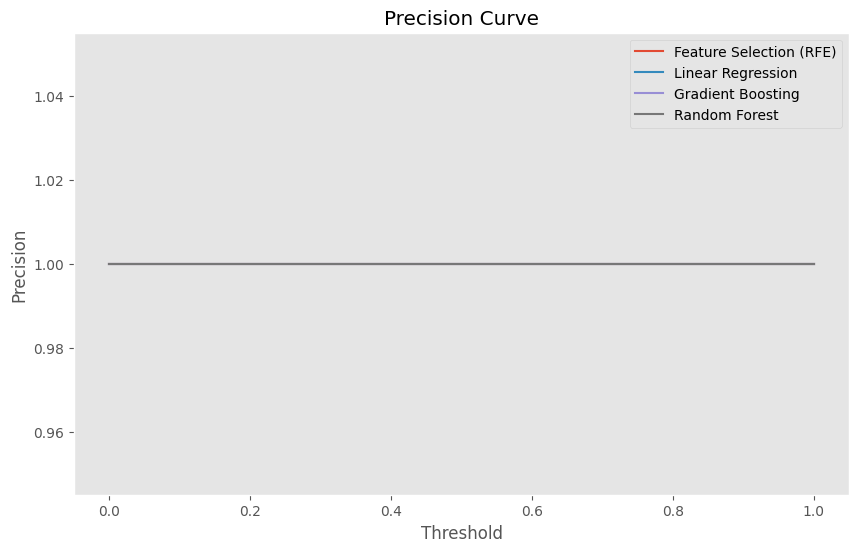

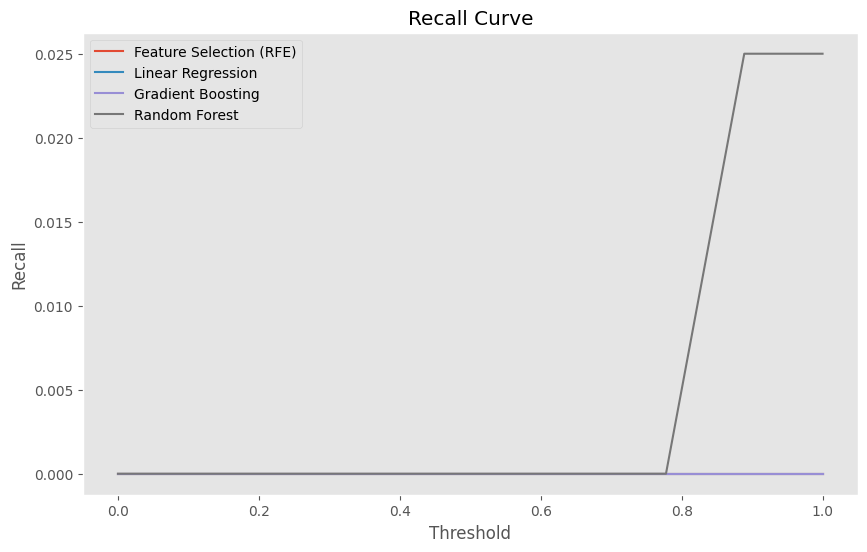

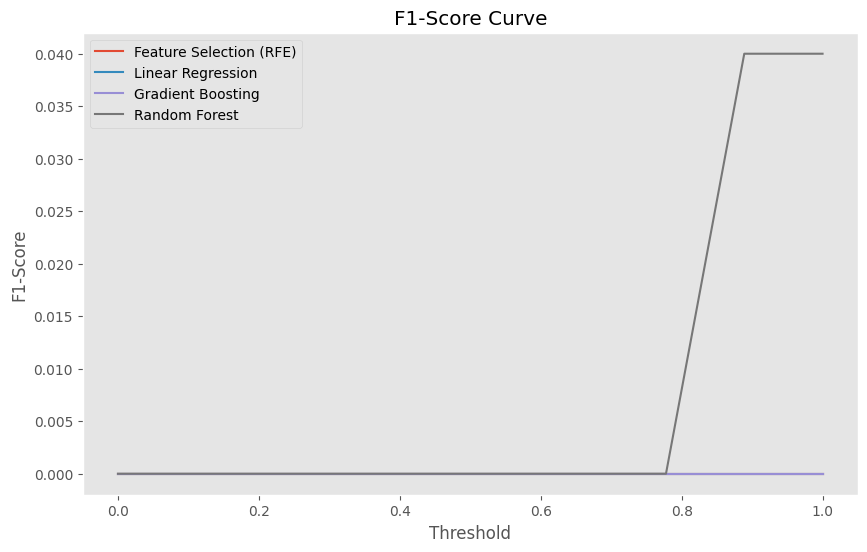

In [ ]:
precision_scores_fs = []
recall_scores_fs = []
f1_scores_fs = []
precision_scores_linear = []
recall_scores_linear = []
f1_scores_linear = []
precision_scores_gb = []
recall_scores_gb = []
f1_scores_gb = []
precision_scores_rf = []
recall_scores_rf = []
f1_scores_rf = []
thresholds = np.linspace(0, 1, 10)
for threshold in thresholds:
    y_pred_fs_round = (y_pred_fs >= threshold).astype(int)
    y_pred_linear_round = (prediction2 >= threshold).astype(int)
    y_pred_gb_round = (linear_gb.predict(x_test) >= threshold).astype(int)
    y_pred_rf_round = (linear_rf.predict(x_test) >= threshold).astype(int)
    
    precision_scores_fs.append(precision_score(y_test, y_pred_fs_round, average='weighted', zero_division=1))
    recall_scores_fs.append(recall_score(y_test, y_pred_fs_round, average='weighted', zero_division=1))
    f1_scores_fs.append(f1_score(y_test, y_pred_fs_round, average='weighted', zero_division=1))
    
    precision_scores_linear.append(precision_score(y_test, y_pred_linear_round, average='weighted', zero_division=1))
    recall_scores_linear.append(recall_score(y_test, y_pred_linear_round, average='weighted', zero_division=1))
    f1_scores_linear.append(f1_score(y_test, y_pred_linear_round, average='weighted', zero_division=1))
    
    precision_scores_gb.append(precision_score(y_test, y_pred_gb_round, average='weighted', zero_division=1))
    recall_scores_gb.append(recall_score(y_test, y_pred_gb_round, average='weighted', zero_division=1))
    f1_scores_gb.append(f1_score(y_test, y_pred_gb_round, average='weighted', zero_division=1))
    
    precision_scores_rf.append(precision_score(y_test, y_pred_rf_round, average='weighted', zero_division=1))
    recall_scores_rf.append(recall_score(y_test, y_pred_rf_round, average='weighted', zero_division=1))
    f1_scores_rf.append(f1_score(y_test, y_pred_rf_round, average='weighted', zero_division=1))
plt.figure(figsize=(10, 6))
plt.plot(recall_scores_fs, precision_scores_fs, label='Feature Selection (RFE)')
plt.plot(recall_scores_linear, precision_scores_linear, label='Linear Regression')
plt.plot(recall_scores_gb, precision_scores_gb, label='Gradient Boosting')
plt.plot(recall_scores_rf, precision_scores_rf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores_fs, label='Feature Selection (RFE)')
plt.plot(thresholds, precision_scores_linear, label='Linear Regression')
plt.plot(thresholds, precision_scores_gb, label='Gradient Boosting')
plt.plot(thresholds, precision_scores_rf, label='Random Forest')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision Curve')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recall_scores_fs, label='Feature Selection (RFE)')
plt.plot(thresholds, recall_scores_linear, label='Linear Regression')
plt.plot(thresholds, recall_scores_gb, label='Gradient Boosting')
plt.plot(thresholds, recall_scores_rf, label='Random Forest')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall Curve')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10, 6))

plt.plot(thresholds, f1_scores_fs, label='Feature Selection (RFE)')
plt.plot(thresholds, f1_scores_linear, label='Linear Regression')
plt.plot(thresholds, f1_scores_gb, label='Gradient Boosting')
plt.plot(thresholds, f1_scores_rf, label='Random Forest')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score Curve')
plt.legend()
plt.grid()
plt.show()


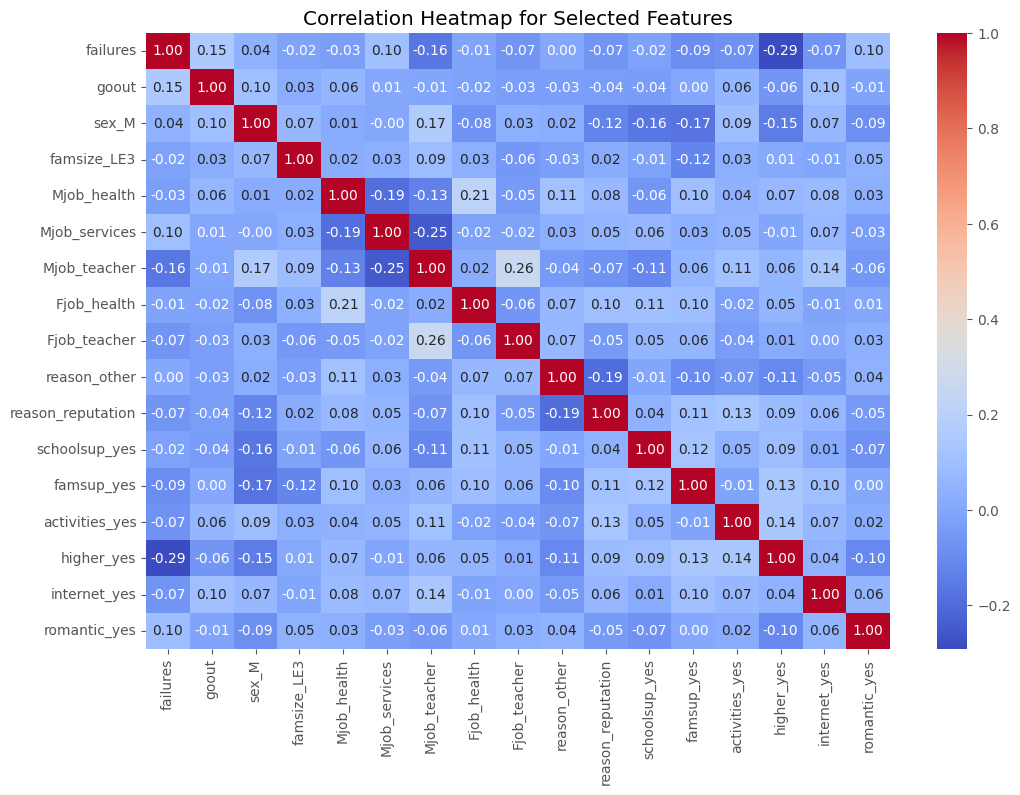

In [ ]:
selected_features_subset = x_train.iloc[:, selected_feature_indices]
correlation_matrix = selected_features_subset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Selected Features")
plt.show()


Manually selected Features and Linear regression:  0.8078600938525367
Co-efficient: 
 [ 0.16559553  0.9696065  -0.15469606 -0.27127765  0.03949715]
Intercept: 
 -1.6250423588933707


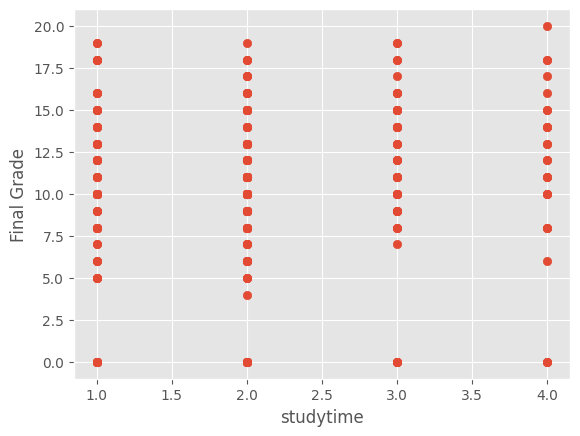

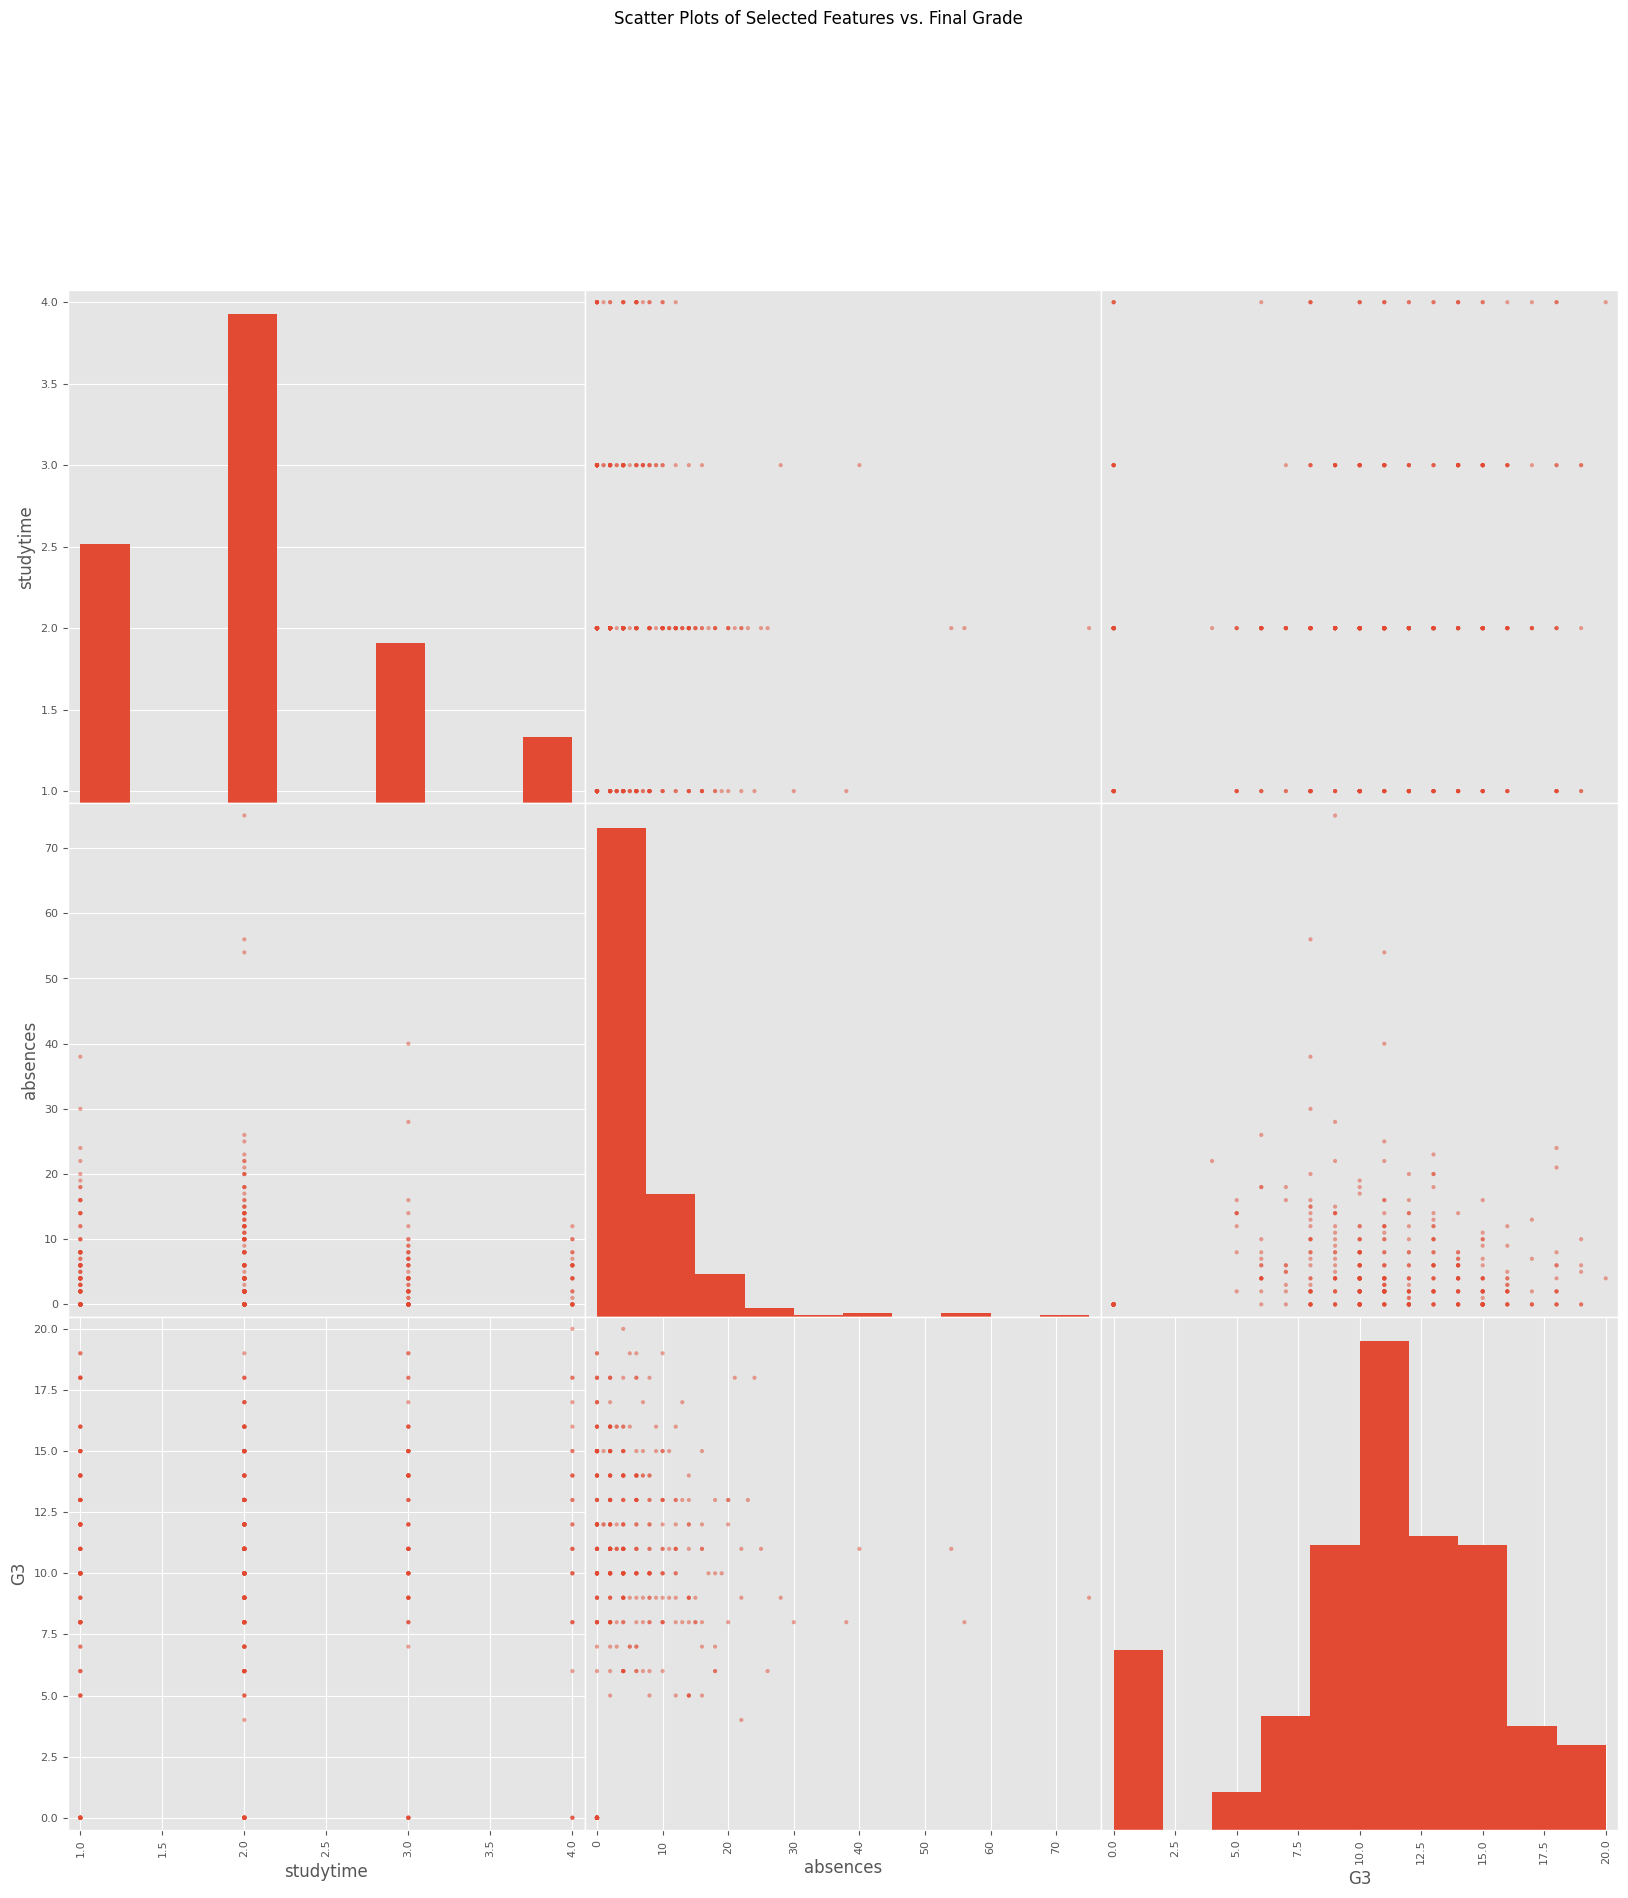

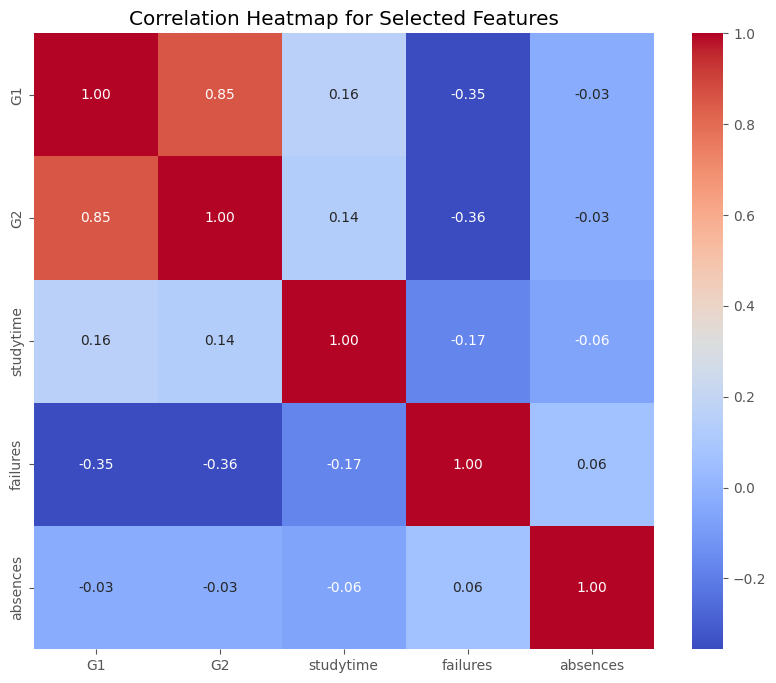

F:\Advance Java\Python\Env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


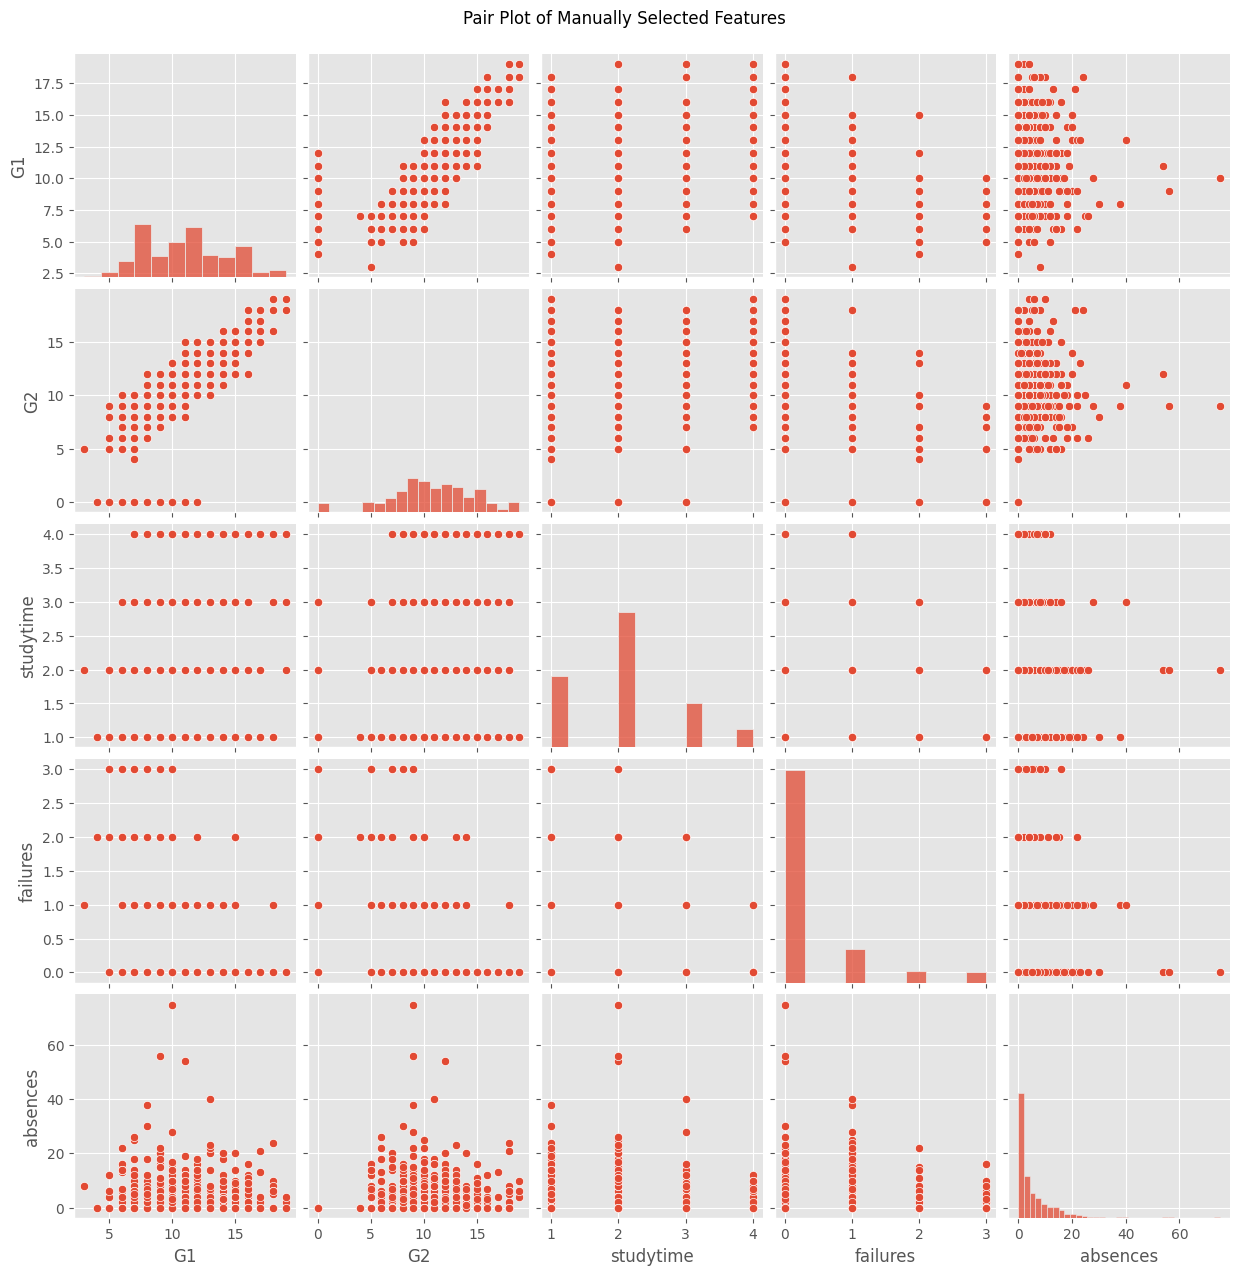

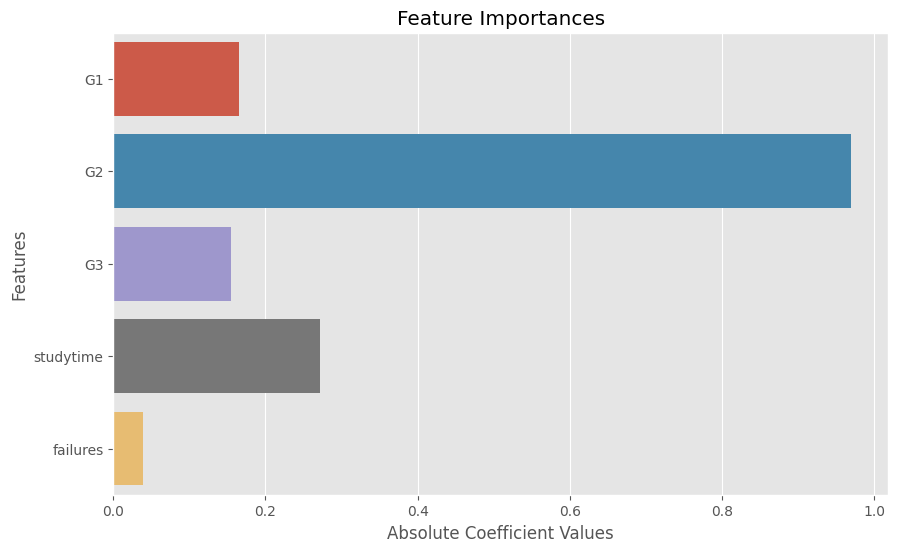

In [ ]:
data = pd.read_csv('student-mat.csv', sep=";")
data=data[["G1","G2","G3","studytime","failures","absences"]]
pre="G3"
P= np.array(data.drop([pre], axis=1))
Q=np.array(data[pre])
p_train, p_test, q_train, q_test=train_test_split(P,Q,test_size=0.1)
regression=linear_model.LinearRegression()
regression.fit(p_train,q_train)
accuracyRegression=regression.score(p_test,q_test)
print("Manually selected Features and Linear regression: ",accuracyRegression)
print("Co-efficient: \n", regression.coef_)
print("Intercept: \n", regression.intercept_)
r='studytime'
style.use("ggplot")
plt.scatter(data[r],data["G3"])
plt.xlabel(r)
plt.ylabel("Final Grade")
plt.show()
selected_features = ['studytime', 'absences']
scatter_matrix(data[selected_features + [pre]], figsize=(20, 20), diagonal='hist')
plt.suptitle("Scatter Plots of Selected Features vs. Final Grade", y=1.02)
plt.show()
selected_features = ["G1", "G2", "studytime", "failures", "absences"]
selected_features_subset = data[selected_features]
correlation_matrix_subset = selected_features_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Selected Features")
plt.show()

selected_features = ["G1", "G2", "studytime", "failures", "absences"]
sns.pairplot(data[selected_features])
plt.suptitle("Pair Plot of Manually Selected Features", y=1.02)
plt.show()
feature_importances = np.abs(regression.coef_)
feature_names = data.columns[:-1]  # Exclude the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Absolute Coefficient Values")
plt.ylabel("Features")
plt.show()